In [1]:
import pandas as pd

# Load your dataset
#file_path = '../data/test_set_window.csv'
#file_path = '../data/rfcc_longest_active_window.csv'
file_path = '../data/training_sequence_forecasts.csv'

df = pd.read_csv(file_path, delimiter=',')

# Convert DateTime to datetime object and set it as index
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.set_index('DateTime', inplace=True)

In [5]:
# Define the attribute of interest
attribute  = "530R002D02.TI0037.MEAS"
attribute2 = "530M105D01.TIC0022.MEAS"
# Calculate the 10th and 90th percentile thresholds
#lower_bound = df[attribute2].quantile(0.1)
#upper_bound = df[attribute].quantile(0.93)
#lower_bound = 674.7158203125
#upper_bound = 740.859375
#lower_bound = 680
upper_bound = 729
# Label anomalies: 1 for anomaly, 0 for normal
#df['labels'] = ((df[attribute2] < lower_bound) | (df[attribute] > upper_bound)).astype(int)
df['labels'] = (df[attribute] > upper_bound).astype(int)
# Create cleaned version
df_cleaned = df.copy()

# Get columns to interpolate (excluding the label column)
columns_to_interpolate = [col for col in df.columns if col != 'labels']

# Replace all values in anomalous rows with NaN for selected columns
df_cleaned.loc[df_cleaned['labels'] == 1, columns_to_interpolate] = None

# Interpolate the entire DataFrame (only on the selected columns)
df_cleaned[columns_to_interpolate] = df_cleaned[columns_to_interpolate].interpolate(
    method='linear', limit_direction='both'
)

In [6]:
df_cleaned.shape

(24032, 23)

In [4]:
lower_bound

680

In [5]:
674.7158203125, 671.66126953125

(674.7158203125, 671.66126953125)

In [6]:
upper_bound

730

In [7]:
740.859375, 742.028137207031

(740.859375, 742.028137207031)

In [7]:
# ========================
# Compute Anomaly Percentage
# ========================
anomaly_percentage = 100 * df['labels'].mean()
print(f"📊 Anomalies represent {anomaly_percentage:.2f}% of the dataset.")


📊 Anomalies represent 0.91% of the dataset.


In [9]:
# Save original + labeled version
#df.to_csv('../data/test_set.csv')

#df.to_csv('../data/preprocessed_data.csv')
df.to_csv('../data/preprocessed_forecasted_data.csv')
# Save cleaned + labeled version
df_cleaned.to_csv('../data/cleaned_labeled_dataset.csv')

print("✅ Saved:")
print("- 'original_labeled_dataset.csv' with original data + labels")
print("- 'cleaned_labeled_dataset.csv' with anomalies replaced + labels")

✅ Saved:
- 'original_labeled_dataset.csv' with original data + labels
- 'cleaned_labeled_dataset.csv' with anomalies replaced + labels


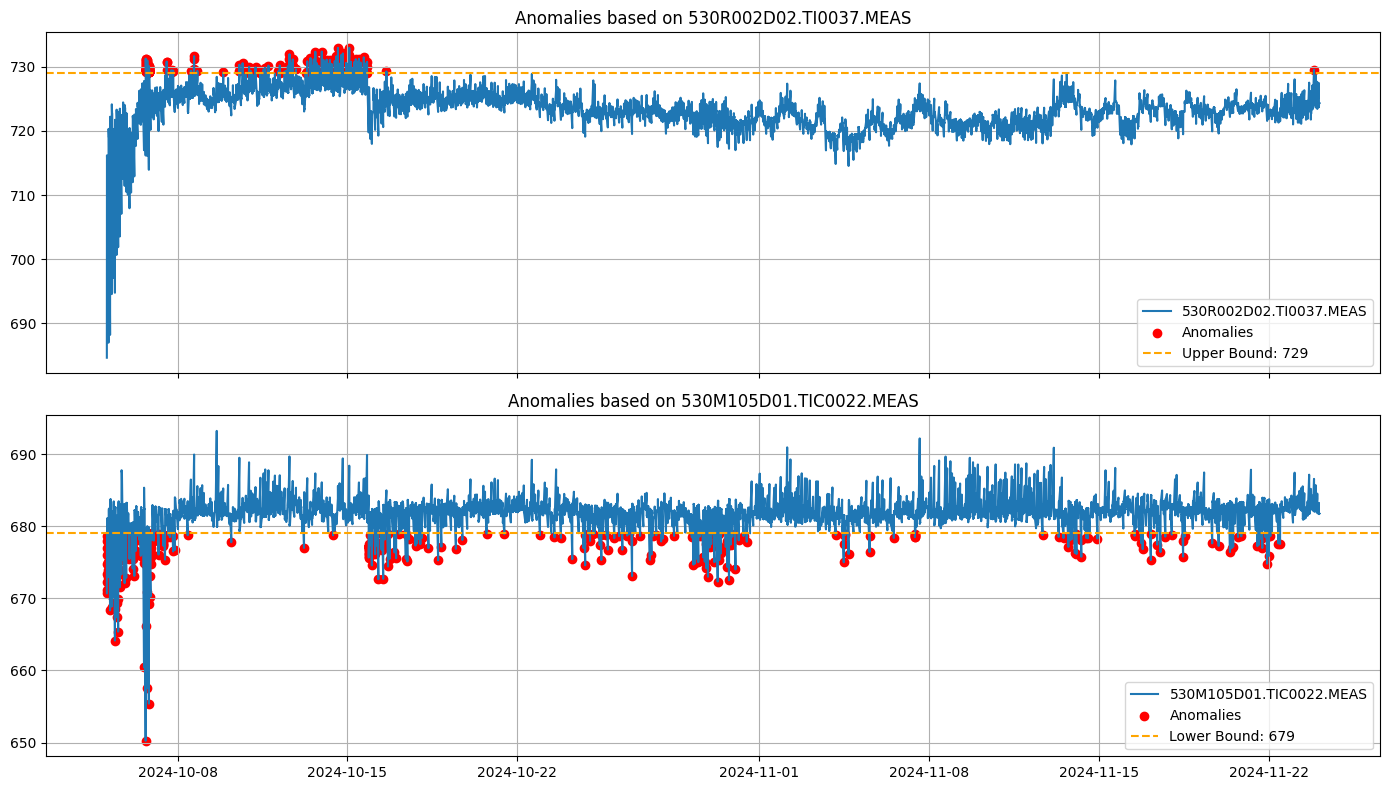

In [8]:
import matplotlib.pyplot as plt

# Plotting anomalies based on the first attribute
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)

# First attribute anomalies
anomalies_attr1 = df[attribute] > upper_bound
axes[0].plot(df.index, df[attribute], label=attribute)
axes[0].scatter(df.index[anomalies_attr1], df[attribute][anomalies_attr1], color='red', label='Anomalies')
axes[0].axhline(upper_bound, color='orange', linestyle='--', label=f'Upper Bound: {upper_bound}')
axes[0].set_title(f"Anomalies based on {attribute}")
axes[0].legend()
axes[0].grid(True)

# Second attribute anomalies
anomalies_attr2 = df[attribute2] < lower_bound
axes[1].plot(df.index, df[attribute2], label=attribute2)
axes[1].scatter(df.index[anomalies_attr2], df[attribute2][anomalies_attr2], color='red', label='Anomalies')
axes[1].axhline(lower_bound, color='orange', linestyle='--', label=f'Lower Bound: {lower_bound}')
axes[1].set_title(f"Anomalies based on {attribute2}")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [11]:
# Anomalies based only on the first attribute
num_anomalies_attr1 = (df[attribute] > upper_bound).sum()

# Anomalies based only on the second attribute
num_anomalies_attr2 = (df[attribute2] < lower_bound).sum()

# Total number of anomalies (either condition triggers an anomaly)
num_anomalies_total = ((df[attribute2] < lower_bound) | (df[attribute] > upper_bound)).sum()

print(f"📌 Anomalies from {attribute} (>{upper_bound}): {num_anomalies_attr1}")
print(f"📌 Anomalies from {attribute2} (<{lower_bound}): {num_anomalies_attr2}")
print(f"📊 Total combined anomalies: {num_anomalies_total}")


📌 Anomalies from 530R002D02.TI0037.MEAS (>730): 364
📌 Anomalies from 530M105D01.TIC0022.MEAS (<680): 887
📊 Total combined anomalies: 1236


In [12]:
# Get the last 5% of the data
n_rows = int(len(df) * 0.05)
df_tail = df.tail(n_rows)
# Count anomalies in the last 5% based on each attribute
num_anomalies_attr1_tail = (df_tail[attribute] > upper_bound).sum()
num_anomalies_attr2_tail = (df_tail[attribute2] < lower_bound).sum()
num_anomalies_total_tail = ((df_tail[attribute2] < lower_bound) | (df_tail[attribute] > upper_bound)).sum()

print(f"📌 [Last 5%] Anomalies from {attribute} (>{upper_bound}): {num_anomalies_attr1_tail}")
print(f"📌 [Last 5%] Anomalies from {attribute2} (<{lower_bound}): {num_anomalies_attr2_tail}")
print(f"📊 [Last 5%] Total combined anomalies: {num_anomalies_total_tail}")


📌 [Last 5%] Anomalies from 530R002D02.TI0037.MEAS (>730): 0
📌 [Last 5%] Anomalies from 530M105D01.TIC0022.MEAS (<680): 99
📊 [Last 5%] Total combined anomalies: 99


In [13]:
n_rows

1427

In [14]:
n_first_rows = int(len(df) * 0.95)

In [15]:
df_first = df[:n_first_rows]

In [16]:
num_anomalies_total_first = ((df_first[attribute2] < lower_bound) | (df_first[attribute] > upper_bound)).sum()

In [17]:
num_anomalies_total_first

1137